In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as mtick
from datetime import datetime
import math

In [2]:
docentes_file = '../data/docentes_periodo.csv'
eval_docentes_file = '../data/eval_docentes_periodo.csv'
materias_file = '../data/mat_cursadas_rend_académico.csv'
perfil_file = '../data/perfil_ingreso.csv'
rendimiento_file = '../data/rendimiento_académico.csv'
rendimiento_file_new = '../data/rendimiento_académico_new.csv'

In [3]:
teachers_by_period = pd.read_csv(docentes_file, delimiter = ';', encoding = "ISO-8859-1")
teachers_assessment = pd.read_csv(eval_docentes_file, delimiter = ';', encoding = "ISO-8859-1")
subjects = pd.read_csv(materias_file, delimiter = ';', encoding = "ISO-8859-1")
student_profile = pd.read_csv(perfil_file, delimiter = ';', encoding = "ISO-8859-1")
student_performance = pd.read_csv(rendimiento_file, delimiter = ';', encoding = "ISO-8859-1")
student_performance_new = pd.read_csv(rendimiento_file_new) #, delimiter = ';', encoding = "ISO-8859-1")

In [4]:
dataframes_list = [teachers_by_period, teachers_assessment, subjects, student_profile, student_performance]
for df in dataframes_list:
    display(df.head(9))

,PERIODO,COD_MAT,COD_DOCENTE
0,201210,11303,1329
1,201210,11304,3111
2,201210,11305,622
3,201210,11312,1329
4,201210,11313,1329
5,201210,11315,4016
6,201210,11318,4093
7,201210,11320,2547
8,201210,11322,2474


,PERIODO,COD_DOCENTE,COD_MAT,COD_FACTOR,NOM_FACTOR,CALIFICACION
0,201210,1008,66410,1,Asistencia y Puntualidad,"4,63"
1,201210,1008,66410,2,Relación profesor alumno,"4,65"
2,201210,1008,66410,3,Orientación del proceso de formación,"4,58"
3,201210,1008,66410,4,Conocimientos,"4,71"
4,201210,1008,66410,5,Planeación del proceso de formación,"4,72"
5,201210,1008,66410,6,Evaluación del aprendizaje,"4,70"
6,201210,1008,66410,7,Imagen y Orden,"4,68"
7,201210,1008,66410,8,Compromiso Institucional,"4,76"
8,201210,1008,66410,9,Investigación y extensión,"4,64"


,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,TOT_MAT_INSCRITAS,MAT_APROBADAS
0,201210,201210,11312001,8,7
1,201210,201210,11312002,8,7
2,201210,201210,11312003,8,7
3,201210,201210,11312004,8,7
4,201210,201210,11312005,8,7
5,201210,201210,11312006,7,3
6,201210,201210,11312007,7,2
7,201210,201210,11312009,6,6
8,201210,201210,11312011,8,7


,PERIODO_COHORTE,CODIGO,GENERO,EDAD,COLEGIO_PROCEDENCIA,PUNT_TOTAL,PUNT_AREA,ES_DESERTOR
0,201210,11312001,M,22.0,COL COOP COOSERVICIOS,438,49,NO
1,201210,11312002,M,23.0,INSTITUTO DE EDUCACION MEDIA DIVERSIFICADA INE...,386,48,NO
2,201210,11312003,F,22.0,I.E. ANTONIO NARIÑO,460,51,NO
3,201210,11312004,F,25.0,I.E. LUIS HERNANDEZ VARGAS,41,42,NO
4,201210,11312005,M,25.0,IE TEC JOSE IGNACIO DE MARQUEZ,50,49,NO
5,201210,11312006,F,32.0,COLEGIO JESUS EUCARISTIA,429,45,SI
6,201210,11312007,M,35.0,COLEGIO CULTURAL SAN DIEGO,478,58,SI
7,201210,11312009,F,28.0,COL. NTRA SRA DEL ROSARIO-CHIQUINQUIRÁ,421,37,SI
8,201210,11312011,F,23.0,GIMNASIO CAMPESTRE SANTO DOMINGO,42,540,NO


,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO
0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA
1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA
2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA
3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA
4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA
5,201210,201210,11312001,11302,LÓGICA,"3,10",APROBADA
6,201210,201210,11312001,11306,DEPORTE FORMATIVO,"4,00",APROBADA
7,201210,201210,11312001,11307,FORMACIÓN INTEG I,"3,50",APROBADA
8,201210,201210,11312002,11313,ADMON BÁSICA,"4,50",APROBADA


In [9]:
student_profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10404 entries, 0 to 10403
Data columns (total 8 columns):
PERIODO_COHORTE        10404 non-null int64
CODIGO                 10404 non-null int64
GENERO                 10404 non-null object
EDAD                   10402 non-null float64
COLEGIO_PROCEDENCIA    10404 non-null object
PUNT_TOTAL             10404 non-null int64
PUNT_AREA              10404 non-null int64
ES_DESERTOR            10404 non-null object
dtypes: float64(1), int64(4), object(3)
memory usage: 650.3+ KB


In [10]:
student_profile[student_profile['EDAD'].isna()]

,PERIODO_COHORTE,CODIGO,GENERO,EDAD,COLEGIO_PROCEDENCIA,PUNT_TOTAL,PUNT_AREA,ES_DESERTOR
1577,201310,55713038,F,NaN,INSTITUCIÓN EDUCATIVA TÉCNICO INDUSTRIAL GUSTA...,51,54,NO
1912,201310,77313007,F,NaN,COLEGIO NUESTRA SEÑORA DEL ROSARIO - TUNJA,65,68,NO


In [11]:
student_profile.describe()

,PERIODO_COHORTE,CODIGO,EDAD,PUNT_TOTAL,PUNT_AREA
count,10404.000000,1.040400e+04,10402.000000,10404.000000,10404.000000
mean,201599.356978,5.760805e+07,23.717650,212.188293,57.455594
std,247.822818,1.978062e+07,4.045099,124.925721,33.241039
min,201210.000000,1.131200e+07,8.000000,-37.000000,1.000000
25%,201410.000000,5.531202e+07,21.000000,52.000000,47.000000
50%,201610.000000,6.611951e+07,23.000000,261.000000,52.000000
75%,201810.000000,6.661253e+07,25.000000,303.000000,58.000000
max,202110.000000,8.832050e+07,66.000000,896.000000,620.000000


In [12]:
student_profile['ES_DESERTOR'].value_counts()

NO    7035
SI    3369
Name: ES_DESERTOR, dtype: int64

In [13]:
desertores = student_profile[student_profile['ES_DESERTOR']=='SI']
desertores.groupby('COLEGIO_PROCEDENCIA')[['ES_DESERTOR']].count().sort_values('ES_DESERTOR', ascending = False).head()

,ES_DESERTOR
COLEGIO_PROCEDENCIA,
INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO,73
COLEGIO CORPORACION SANTO DOMINGO,64
LICEO ANGLO AMERICANO DE SOGAMOSO,54
COLEGIO DE BOYACÁ,54
INSTITUTO DE EDUCACION MEDIA DIVERSIFICADA INEM CARLOS ARTURO TORRES,46


In [14]:
student_profile['COLEGIO_PROCEDENCIA'].value_counts().head()

COLEGIO DE BOYACÁ                                            179
INSTITUCION EDUCATIVA INTEGRADO JOAQUIN GONZALEZ CAMARGO     171
INSTITUCIÓN EDUCATIVA TÉCNICO INDUSTRIAL GUSTAVO JIMÉNEZ     166
ESCUELA NORMAL SUPERIOR LEONOR ALVAREZ PINZON                144
INSTITUCIÓN EDUCATIVA POLITÉCNICO ÁLVARO GONZÁLEZ SANTANA    143
Name: COLEGIO_PROCEDENCIA, dtype: int64

In [15]:
teachers_assessment['CALIFICACION'] = teachers_assessment['CALIFICACION'].str.replace(',','.')
teachers_assessment['CALIFICACION'] = teachers_assessment['CALIFICACION'].astype('float64')

In [16]:
teachers=teachers_assessment.groupby('COD_DOCENTE')[['CALIFICACION']].mean().sort_values('CALIFICACION', ascending = True)

In [17]:
teachers = teachers.reset_index()

In [18]:
teachers.head()

,COD_DOCENTE,CALIFICACION
0,3535,2.097778
1,2193,2.313333
2,3534,2.703333
3,4647,2.746667
4,4307,2.774444


In [19]:
display(teachers_by_period.head())
teachers_by_period['COD_DOCENTE'] = teachers_by_period['COD_DOCENTE'].astype('str')

,PERIODO,COD_MAT,COD_DOCENTE
0,201210,11303,1329
1,201210,11304,3111
2,201210,11305,622
3,201210,11312,1329
4,201210,11313,1329


In [20]:
student_performance.head()

,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO
0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA
1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA
2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA
3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA
4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA


In [21]:
student_performance['COD_DOCENTE'] = np.nan
student_performance.head()

,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO,COD_DOCENTE
0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA,NaN
1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA,NaN
2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA,NaN
3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA,NaN
4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA,NaN


In [105]:
# DO NOT RUN THIS CELL!!!!!!!!!!!!!!!!!
for idx in range(0, len(student_performance)):
    cod_mat = student_performance.loc[idx, 'COD_MAT']
    periodo = student_performance.loc[idx, 'PERIODO_COHORTE']
    
    
    try:
        cod_docente = teachers_by_period[(teachers_by_period['COD_MAT'] == cod_mat) & \
                                        (teachers_by_period['PERIODO'] == periodo)]['COD_DOCENTE'].values[0]
    except:
        cod_docente = np.nan
    
    student_performance.loc[idx, 'COD_DOCENTE'] = cod_docente

In [23]:
student_performance_new.head()

,Unnamed: 0,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO,COD_DOCENTE
0,0,201210,201210,11312001,11305,EXP. ORAL ESCRITA,"3,50",APROBADA,622.0
1,1,201210,201210,11312001,11312,INICIATIVA EMPRES,"4,00",APROBADA,1329.0
2,2,201210,201210,11312001,11310,MICROECONOMÍA,"3,60",APROBADA,NaN
3,3,201210,201210,11312001,11315,INFORMÁTICA BÁSICA,"3,30",APROBADA,4016.0
4,4,201210,201210,11312001,11303,INTROD. AL PROGRAMA,"3,80",APROBADA,1329.0


In [24]:
student_performance_new.ESTADO.value_counts()

APROBADA       313697
NO APROBADA     50795
Name: ESTADO, dtype: int64

In [25]:
df_reprobados = student_performance_new[student_performance_new['ESTADO'] == 'NO APROBADA' ]
df_reprobados.head()

,Unnamed: 0,PERIODO_COHORTE,PERIODO_ACADEMICO,CODIGO,COD_MAT,NOMBRE_MAT,NOTA_DEF,ESTADO,COD_DOCENTE
64,64,201210,201210,11312006,11312,INICIATIVA EMPRES,"2,20",NO APROBADA,1329.0
66,66,201210,201210,11312006,11315,INFORMÁTICA BÁSICA,"0,00",NO APROBADA,4016.0
70,70,201210,201210,11312006,11310,MICROECONOMÍA,"2,60",NO APROBADA,NaN
72,72,201210,201210,11312007,11305,EXP. ORAL ESCRITA,"0,00",NO APROBADA,622.0
73,73,201210,201210,11312007,11302,LÓGICA,"1,80",NO APROBADA,NaN


In [26]:
df_reprobados_docente = df_reprobados.groupby('COD_DOCENTE')[['ESTADO']].count().sort_values('ESTADO',ascending = False)

In [27]:
df_reprobados_docente.head()

,ESTADO
COD_DOCENTE,
3168.0,443
613.0,412
2925.0,356
3313.0,346
2927.0,338


In [114]:
df_reprobados_docente = df_reprobados_docente.reset_index()

In [115]:
df_reprobados_docente.columns = ['COD_DOCENTE', 'num_reprobados']

In [119]:
df_reprobados_docente['CALIFICACION'] = np.nan
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados,CALIFICACION
0,3168,443,NaN
1,613,412,NaN
2,2925,356,NaN
3,3313,346,NaN
4,2927,338,NaN


In [118]:
teachers.head()

,COD_DOCENTE,CALIFICACION
0,3535,2.097778
1,2193,2.313333
2,3534,2.703333
3,4647,2.746667
4,4307,2.774444


In [130]:
for idx in range(0, len(df_reprobados_docente)):
    cod_docente = int(df_reprobados_docente.loc[idx, 'COD_DOCENTE'])
    
    
    try:
        calificacion = teachers[(teachers['COD_DOCENTE'] == cod_docente)]['CALIFICACION'].values[0]
    except:
        calificacion = np.nan
    
    df_reprobados_docente.loc[idx, 'CALIFICACION'] = calificacion

In [131]:
df_reprobados_docente.head()

,COD_DOCENTE,num_reprobados,CALIFICACION
0,3168,443,4.678175
1,613,412,4.626111
2,2925,356,4.720181
3,3313,346,4.566049
4,2927,338,4.603750


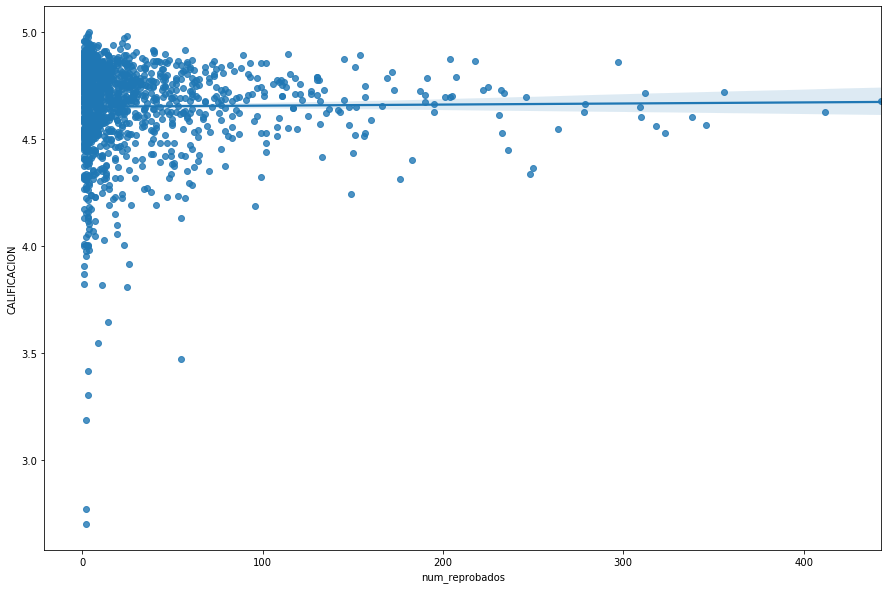

In [134]:
fig, axes = plt.subplots(figsize = (15, 10))

sns.regplot(x="num_reprobados", y="CALIFICACION", data=df_reprobados_docente)


In [29]:
range(0, 5)

range(0, 5)

In [30]:
for i in range(0, 5):
    print(i)

0
1
2
3
4


In [5]:
student_performance.PERIODO_COHORTE.value_counts()

201710    31677
201610    31651
201310    31245
201210    28666
201510    26486
201410    24998
201220    22899
201620    20782
201720    20580
201420    19792
201520    19590
201810    19082
201320    18271
201910    16121
201820    12880
202010     9360
201920     9159
202020     1013
202110      240
Name: PERIODO_COHORTE, dtype: int64

In [12]:
for periodo in student_profile['PERIODO_COHORTE'].unique():
    cohorte202020 = student_profile[student_profile['PERIODO_COHORTE'] == periodo]
    print(periodo)
    print(cohorte202020.ES_DESERTOR.value_counts())
    print(' ')

201210
NO    326
SI    323
Name: ES_DESERTOR, dtype: int64
 
201220
SI    327
NO    248
Name: ES_DESERTOR, dtype: int64
 
201310
SI    367
NO    357
Name: ES_DESERTOR, dtype: int64
 
201320
SI    252
NO    199
Name: ES_DESERTOR, dtype: int64
 
201410
SI    304
NO    291
Name: ES_DESERTOR, dtype: int64
 
201420
NO    244
SI    236
Name: ES_DESERTOR, dtype: int64
 
201510
NO    338
SI    311
Name: ES_DESERTOR, dtype: int64
 
201520
NO    277
SI    215
Name: ES_DESERTOR, dtype: int64
 
201610
NO    483
SI    281
Name: ES_DESERTOR, dtype: int64
 
201620
NO    345
SI    206
Name: ES_DESERTOR, dtype: int64
 
201710
NO    585
SI    286
Name: ES_DESERTOR, dtype: int64
 
201720
NO    453
SI    152
Name: ES_DESERTOR, dtype: int64
 
201810
NO    508
SI    109
Name: ES_DESERTOR, dtype: int64
 
201820
NO    470
Name: ES_DESERTOR, dtype: int64
 
201910
NO    690
Name: ES_DESERTOR, dtype: int64
 
201920
NO    454
Name: ES_DESERTOR, dtype: int64
 
202010
NO    658
Name: ES_DESERTOR, dtype: int64
 
202